In [1]:

%matplotlib inline
import numpy as np
import glob
from scipy.stats import skew 
from scipy.stats import kurtosis 
import pandas as pd
import matplotlib.pyplot as plt
import time,os
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow as tf

In [2]:


directory1=(r"C:\Users\Lenovo\Downloads\01_New_Plant_Diseases_Dataset\01_New_Plant_Diseases_Dataset\train")

list_of_labels = os.listdir(directory1)
countclass=[]

c1=[]
c2=[]
c3=[]
c4=[]
c5=[]




for label in list_of_labels:
    current_label_dir_path = os.path.join(directory1, label)
    list_of_images = os.listdir(current_label_dir_path)
    os.chdir(current_label_dir_path)


    for imag in glob.glob("*.jpg"):
    
        im=cv2.cvtColor(cv2.imread(imag),cv2.COLOR_BGR2RGB)
        
        hist = cv2.calcHist(im,[1],None,[256],[0,256]) 
       
        
        kurt = kurtosis(hist)
        skewness = skew(hist)
        
        c3.append(kurt[0])
        c4.append(skewness[0])
        c5.append(current_label_dir_path + '\\' + imag)
       
        

Analyse={"Kurtosis":c3,"Skewness":c4,"Image": c5}   

df=pd.DataFrame(data=Analyse)                



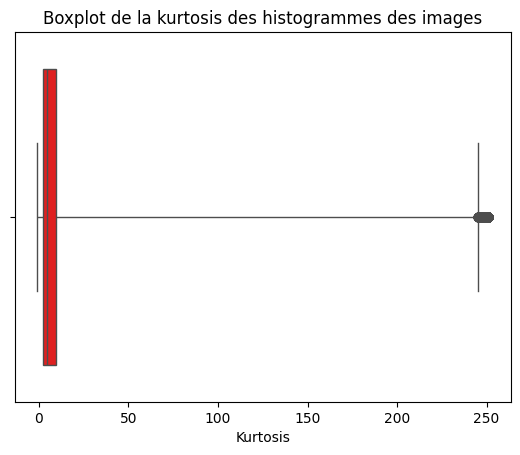

In [3]:

plt.title('Boxplot de la kurtosis des histogrammes des images')
plt.xlabel('Kurtosis')
sns.boxplot(x=df["Kurtosis"],color='r',whis=34.5)
plt.show()

In [4]:
df_outliers=df[df["Kurtosis"]>=250]
df_outliers.to_csv('Outliers_kurtosis.csv')
df_outliers


,Kurtosis,Skewness,Image
4014,250.668640,15.890274,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
4021,251.003891,15.906096,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
4027,250.576233,15.885978,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
4035,250.818222,15.897357,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
4041,251.003891,15.906096,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
...,...,...,...
68161,250.799911,15.896533,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
68237,251.003891,15.906096,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
68289,251.003891,15.906096,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
68313,250.253677,15.870993,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...


,Unnamed: 0,Kurtosis,Skewness,Image
0,4014,250.66864,15.890274,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
1,4021,251.00389,15.906095,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
2,4027,250.57623,15.885978,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
3,4035,250.81822,15.897357,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
4,4041,251.00389,15.906095,C:\Users\Lenovo\Downloads\01_New_Plant_Disease...
